# 8.1. Getting started with scikit-learn

**We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve fitting regression problem.**

**1.  First, let's import libraries.**

In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

**2.  Let's define a function g(x):** $g(x)=x^2$

In [2]:
def g(x): 
    return x**3

**3.  We generate the values along the curve on [-10,10] and plot the function. g(x)**


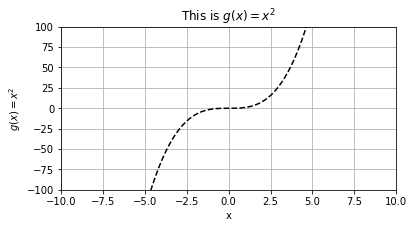

In [3]:
x_tr = np.linspace(-10., 10, 200)
y_tr = g(x_tr)

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.set_xlim(-10, 10)
ax.set_ylim(-100, 100)
ax.set_title('This is $g(x)=x^2$')
plt.xlabel("x")
plt.ylabel("$g(x)=x^2$")
plt.grid()


**4. Let's do some curve fitting!**

**We first define a deterministic nonlinear function underlying our generative model:** $f(x)=e^{3x}$

** We then generate some data points within [0,1] and add some Gaussian noise.**


In [4]:
def f(x):
    return np.exp(3*x)

noise=5
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + noise * np.random.randn(len(x))

x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

**5.  Let's plot our data points on [0,1].  In the image, the dotted curve represents the generative model.**


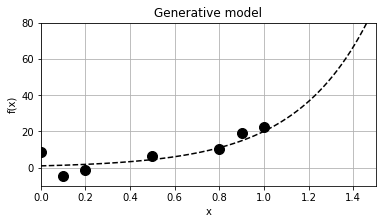

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()


**6.  Now, we use scikit-learn to fit a linear model to the data. There are three steps.**
1. First, we create the model (an instance of the LinearRegression class). 
2. Then, we fit the model to our data (also called train the model)
3. Finally, we predict values from our trained model.

**We need to convert x and x_tr to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have seven observations with one feature.**


In [6]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])

**7.  We now plot the result of the trained linear model. We obtain a regression line in green here:**



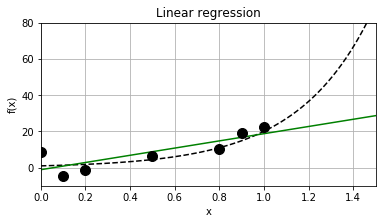

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()


**8.  The linear fit is not well-adapted here, as the data points are generated according to a nonlinear model (an exponential curve). Therefore, we are now going to fit a nonlinear model. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for this, by precomputing the exponents of our data points. This is done by generating a Vandermonde matrix, using the np.vander() function. In the following code, we perform and plot the fit:**

Fit linear model: $h(x) = ax + b$

Fit 6th order: $h(x) = ax^6 + bx^5 + cx^4 + dx^3 + ex^2 + fx^1 + g$ 



Coefficients, degree 1:
	 19.88 0.00
Coefficients, degree 2:
	 44.62 -24.74 0.00
Coefficients, degree 3:
	 -67.79 146.30 -62.54 0.00
Coefficients, degree 5:
	 -2107.18 5634.70 -5317.33 2103.24 -299.66 0.00


Text(0.5,1,'Linear regression')

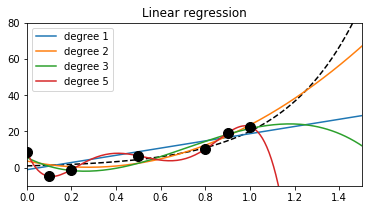

In [8]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([1, 2, 3, 5], ['-','-', '-','-']):
    lrp.fit(np.vander(x,deg + 1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

**We have fitted two polynomial models of degree 2 and 5. The degree 2 polynomial appears to fit the data points less precisely than the degree 5 polynomial. However, it seems more robust; the degree 5 polynomial seems really bad at predicting values outside the data points (look for example at the x≥1 portion). This is what we call overfitting; by using a too-complex model, we obtain a better fit on the trained dataset, but a less robust model outside this set.**



**9.  We will now use a different learning model called ridge regression. It works like linear regression except that it prevents the polynomial's coefficients from becoming too big. This is what happened in the previous example. By adding a regularization term in the loss function, ridge regression imposes some structure on the underlying model. We will see more details in the next section.**

**The ridge regression model has a meta-parameter, which represents the weight of the regularization term. We could try different values with trial and error using the Ridge class. However, scikit-learn provides another model called RidgeCV, which includes a parameter search with cross-validation. In practice, this means that we don't have to tweak this parameter by hand—scikit-learn does it for us. As the models of scikit-learn always follow the fit-predict API, all we have to do is replace lm.LinearRegression() with lm.RidgeCV() in the previous code. We will give more details in the next section.**



Coefficients, degree 1: 18.07 0.00
Coefficients, degree 2: 16.71 2.88 0.00
Coefficients, degree 3: 10.98 9.40 0.12 0.00
Coefficients, degree 5: 3.69 3.81 3.93 3.93 2.89 0.00


Text(0.5,1,'Ridge regression')

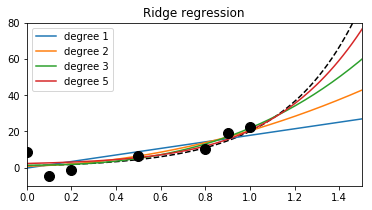

In [9]:
ridge = lm.RidgeCV()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([1, 2, 3, 5], ['-','-', '-','-']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")